**Загрузка библиотек**

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import buttord, butter, lfilter, freqz
from scipy import signal

**Исходные данные**

In [2]:
N = 2048  # число отсчётов
t = np.arange(0, N)  # вектор времени
ti = np.arange(0, 128) # интервал построения графика сигнала
Fd = 2048  # частота дискретизации
fi = np.array([250, 500, 300, 350, 600, 650]) # частоты функции многокомпонентного сигнала
A = np.array([1.0, 0.2, 0.5, 0.3, 0.2, 0.8]) # амплитуды функции
indx = 2 # индекс частоты, который подлежит удалению
fni = fi / Fd # нормированные частоты
Rp = 1 # параметры уровня пульсации в полосе пропускания (ПП)
Rs = 40 # параметры уровня пульсации в полосе заграждения (ПЗ)

**Формирование сигнала из шести компонентов**

In [3]:
y = A[0] * np.sin(2 * np.pi * fni[0] * t) + A[1] * np.sin(2 * np.pi * fni[1] * t) + \
        A[2] * np.sin(2 * np.pi * fni[2] * t) + A[3] * np.sin(2 * np.pi * fni[3] * t) + \
        A[4] * np.sin(2 * np.pi * fni[4] * t) + A[5] * np.sin(2 * np.pi * fni[5] * t)

**Построение графика сигнала на интервале от 0 до 128**

Text(0.5, 1.0, 'График входного сигнала')

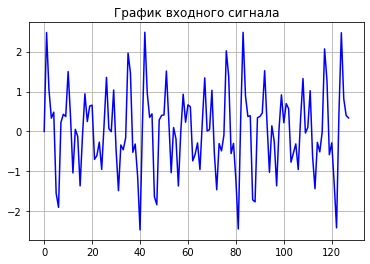

In [5]:
fig, ax = plt.subplots()
ax.plot(ti, y[ti], 'b')
ax.grid()
ax.set_title('График входного сигнала')

**Расчёт модуля спектра полученного сигнала и построение его графика**

Text(0.5, 1.0, 'График модуля спектра входного сигнала')

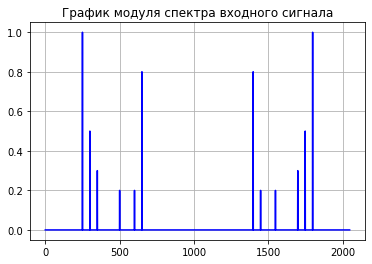

In [6]:
Ys = np.fft.fft(y, N)  # Вычисление спектра сигнала y
MYs = (2 / N) * np.abs(Ys)  # Вычисление спектра мощности y
fig, ax = plt.subplots()
ax.plot(t, MYs[t], 'b')
ax.grid()
ax.set_title('График модуля спектра входного сигнала')

**Расчёт порядка фильтра n и вектора частот среза Wn БИХ-фильтра**

In [11]:
W1pp = fi[indx] - 35 # вычисление частот границ полос пропускания
W2pp = fi[indx] + 35
print(f'Граничные частоты полосы пропускания: {W1pp} {W2pp}')
W1ss = fi[indx] - 15 # вычисление частот границ полос заграждения
W2ss = fi[indx] + 15
print(f'Граничные частоты полосы заграждения: {W1ss} {W2ss}')
Wp = np.array([2 * W1pp / Fd, 2 * W2pp / Fd])
print(f'Нормированные граничные частоты полосы пропускания: {Wp}')
Ws = np.array([2 * W1ss / Fd, 2 * W2ss / Fd])
print(f'Нормированные граничные частоты полосы заграждения: {Ws}')
# Расчет импульсной характеристики Чебышева
n, Wn = signal.cheb1ord(Wp, Ws, Rp, Rs)
print(f'Минимальный порядок фильтра n = {n}')
print(f'Частоты среза: {Wn}')

Граничные частоты полосы пропускания: 265 335
Граничные частоты полосы заграждения: 285 315
Нормированные граничные частоты полосы пропускания: [0.25878906 0.32714844]
Нормированные граничные частоты полосы заграждения: [0.27832031 0.30761719]
Минимальный порядок фильтра n = 5
Частоты среза: [0.2608956  0.32714673]


**Расчёт однополосного режекторного БИХ-фильтра для фильтрации сигнала**

Расчёт фильтра Чебышева 1

In [13]:
b, a = signal.cheby1(n, Rp, Wn, 'stop')

**Фильтрация полученным фильтром входного сигнала**

In [14]:
yf = lfilter(b, a, y) # фильтрация сигнала функцией filter

**Расчёт модуля спектра после фильтрацииа и построение его графика**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


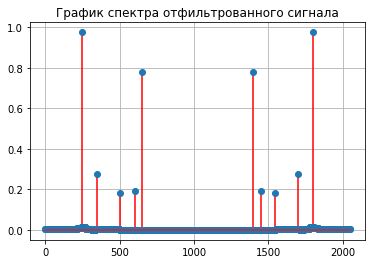

In [16]:
YFs = np.fft.fft(yf, N)  # Вычисляем спектр сигнала yf
MYF = (2 / N) * np.abs(YFs)  # Вычисляем спектр мощности yf
fig, ax = plt.subplots()
ax.stem(t - 1, MYF[t], 'r')
ax.grid()
ax.set_title('График спектра отфильтрованного сигнала')
plt.show()

**Построение графиков АЧХ и ФЧХ полученного фильтра**

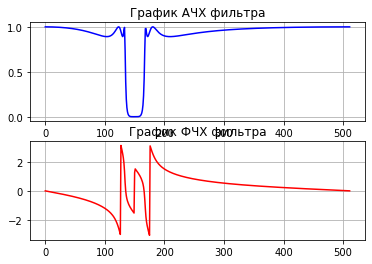

In [17]:
f, h = freqz(b, a)
AMP = np.abs(h)  # АЧХ
FAZ = np.angle(h)  # ФЧХ

fig1, ax1 = plt.subplots(2)
ax1[0].plot(AMP, 'b')
ax1[0].grid()
ax1[0].set_title('График АЧХ фильтра')
ax1[1].plot(FAZ, 'r')
ax1[1].grid()
ax1[1].set_title('График ФЧХ фильтра')
plt.show()